In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
pd.set_option("display.max_columns", 104)
import patsy
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import ttest_ind, chisquare, normaltest
# Note: the statsmodels import may print out a 'FutureWarning'. Thats fine.

import statsmodels.api as sm
from statsmodels.formula.api import ols

In [28]:
df = pd.read_excel('/Users/mckayladavid/Documents/GitHub/Group019_WI24/data/tech_layoffs.xlsx')

df

,#,Company,Location_HQ,Country,Continent,Laid_Off,Date_layoffs,Percentage,Company_Size_before_Layoffs,Company_Size_after_layoffs,Industry,Stage,Money_Raised_in_$_mil,Year,lat,lng
0,3,ShareChat,Bengaluru,India,Asia,200,2023-12-20,15.0,1333,1133,Consumer,Series H,$1700,2023,12.97194,77.59369
1,4,InSightec,Haifa,Israel,Asia,100,2023-12-19,20.0,500,400,Healthcare,Unknown,$733,2023,32.81841,34.98850
2,6,Enphase Energy,San Francisco Bay Area,USA,North America,350,2023-12-18,10.0,3500,3150,Energy,Post-IPO,$116,2023,37.54827,-121.98857
3,7,Udaan,Bengaluru,India,Asia,100,2023-12-18,10.0,1000,900,Retail,Unknown,1500,2023,12.97194,77.59369
4,14,Cruise,San Francisco Bay Area,USA,North America,900,2023-12-14,24.0,3750,2850,Transportation,Acquired,$15000,2023,37.77493,-122.41942
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1413,3286,Pitch,Berlin,Germany,Europe,80,2024-08-01,67.0,119,39,Other,Series B,$138,2024,52.52437,13.41053
1414,3287,BenchSci,Toronto,Canada,North America,70,2024-08-01,17.0,412,342,Healthcare,Series D,$164,2024,43.70643,-79.39864
1415,3288,NanoString Technology,Seattle,USA,North America,50,2024-08-01,9.0,556,506,Healthcare,Post-IPO,$826,2024,47.60621,-122.33207
1416,3289,Trigo,Tel Aviv,Israel,Asia,30,2024-04-01,15.0,200,170,Retail,Series C,$199,2024,32.08088,34.78057


In [34]:
print(df.dtypes)
print(df.columns)

#                                       int64
Company                                object
Location_HQ                            object
Country                                object
Continent                              object
Laid_Off                                int64
Date_layoffs                   datetime64[ns]
Percentage                            float64
Company_Size_before_Layoffs             int64
Company_Size_after_layoffs              int64
Industry                               object
Stage                                  object
Money_Raised_in_$_mil                  object
Year                                    int64
lat                                   float64
lng                                   float64
dtype: object
Index(['#', 'Company', 'Location_HQ', 'Country', 'Continent', 'Laid_Off',
       'Date_layoffs', 'Percentage', 'Company_Size_before_Layoffs',
       'Company_Size_after_layoffs', 'Industry', 'Stage',
       'Money_Raised_in_$_mil', 'Year', 'lat', 'ln

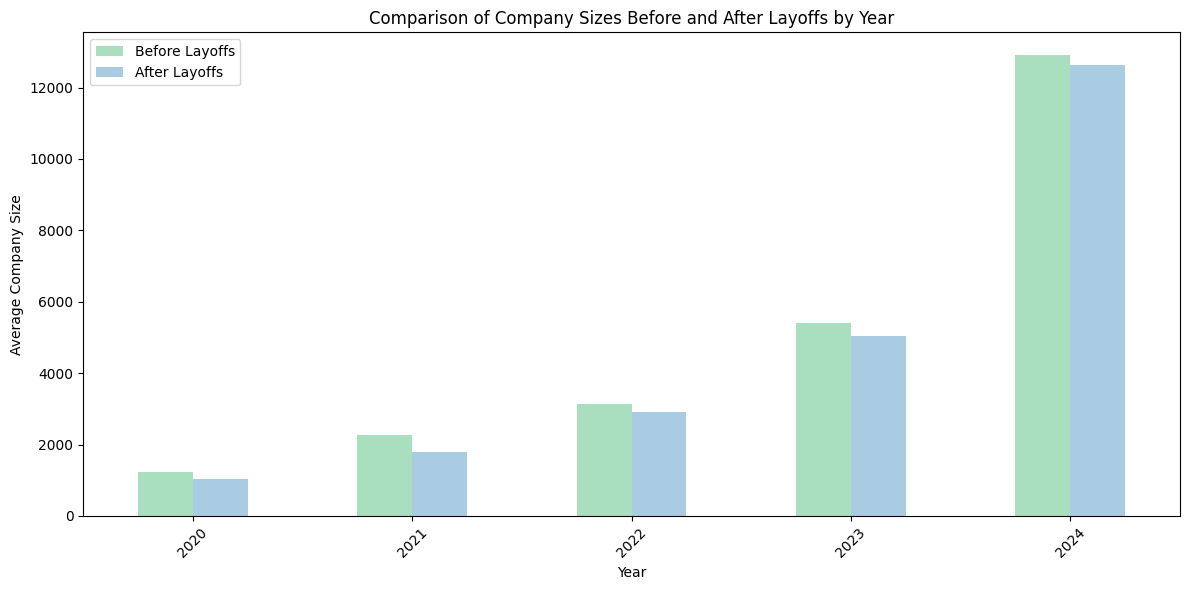

In [32]:
# company size before/after layoffs by industry
industry_sizes = df.groupby('Year').agg({
    'Company_Size_before_Layoffs': 'mean',
    'Company_Size_after_layoffs': 'mean'
})

#plot
industry_sizes.plot(kind = 'bar', figsize = (12, 6), color  = ['#A9DFBF', '#A9CCE3'])
plt.title('Comparison of Company Sizes Before and After Layoffs by Year')
plt.xlabel('Year')
plt.ylabel('Average Company Size')
plt.xticks(rotation = 45)
plt.legend(['Before Layoffs', 'After Layoffs'])
plt.tight_layout()

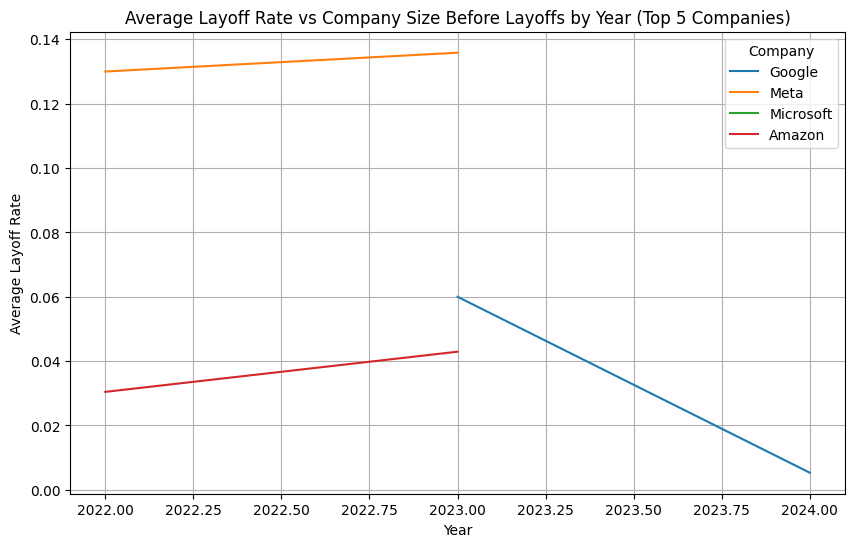

In [41]:
# THIS IS A BAD GRAPH, I AM WORKING ON IT

top_companies = df.nlargest(5, 'Laid_Off')['Company'].unique()

# Filter the DataFrame to include only the top 5 companies
top_companies_df = df[df['Company'].isin(top_companies)]

# Group by 'Company' and 'Year' and then calculate the average layoff rate
top_companies_grouped = top_companies_df.groupby(['Company', 'Year']).agg({
    'Laid_Off': 'sum',
    'Company_Size_before_Layoffs': 'mean'
}).reset_index()

# Calculate the layoff rate
top_companies_grouped['Layoff_Rate'] = top_companies_grouped['Laid_Off'] / top_companies_grouped['Company_Size_before_Layoffs']

# Plotting
plt.figure(figsize=(10, 6))

# Plot a line for each top company
for company in top_companies:
    company_data = top_companies_grouped[top_companies_grouped['Company'] == company]
    plt.plot(company_data['Year'], company_data['Layoff_Rate'], label=company)

plt.title('Average Layoff Rate vs Company Size Before Layoffs by Year (Top 5 Companies)')
plt.xlabel('Year')
plt.ylabel('Average Layoff Rate')
plt.legend(title='Company')
plt.grid(True)
plt.show()

In [42]:
df.head()

,#,Company,Location_HQ,Country,Continent,Laid_Off,Date_layoffs,Percentage,Company_Size_before_Layoffs,Company_Size_after_layoffs,Industry,Stage,Money_Raised_in_$_mil,Year,lat,lng,Layoff_Rate
0,3,ShareChat,Bengaluru,India,Asia,200,2023-12-20,15.0,1333,1133,Consumer,Series H,$1700,2023,12.97194,77.59369,0.150038
1,4,InSightec,Haifa,Israel,Asia,100,2023-12-19,20.0,500,400,Healthcare,Unknown,$733,2023,32.81841,34.98850,0.200000
2,6,Enphase Energy,San Francisco Bay Area,USA,North America,350,2023-12-18,10.0,3500,3150,Energy,Post-IPO,$116,2023,37.54827,-121.98857,0.100000
3,7,Udaan,Bengaluru,India,Asia,100,2023-12-18,10.0,1000,900,Retail,Unknown,1500,2023,12.97194,77.59369,0.100000
4,14,Cruise,San Francisco Bay Area,USA,North America,900,2023-12-14,24.0,3750,2850,Transportation,Acquired,$15000,2023,37.77493,-122.41942,0.240000
